# IHLT LAB 1

Lab developed by:
- Oriol Miró López-Feliu
- Niklas Long Schiefelbein

Statement: Develop a colab notebook that show the 25 non-stopwords with more number of occurrences in the file 'blake-poems.txt' of Gutenberg corpus.

## Importing and loading basic things

In [1]:
# Imports
import nltk
import matplotlib.pyplot as plt # graphing results

# Downlaoding data
nltk.download('gutenberg')
nltk.download('stopwords')

# Loading text and stopwords
txt       = nltk.corpus.gutenberg.words('blake-poems.txt')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Useful functions

In [2]:
def plot_word_frequencies(results):
    # Separate word and freques
    words       = [item[0] for item in results]
    frequencies = [item[1] for item in results]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Word Frequencies')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## Approaches

### 1. Naive Approach

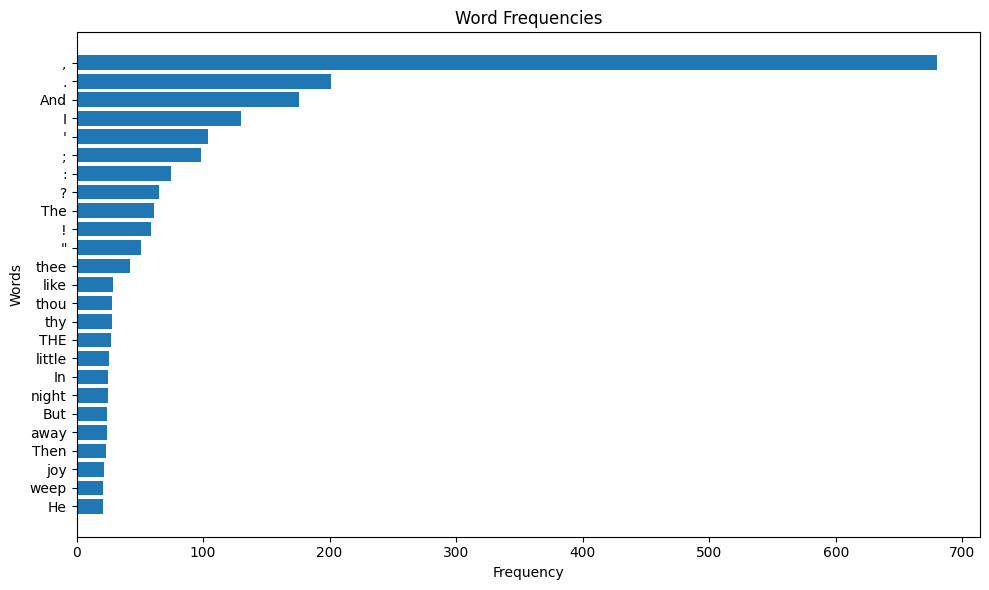

In [3]:
# We compute the frequencies of each word
freqs_approach1 = {
    w : txt.count(w)
    for w in set(txt)
    if w not in stopwords
}

# And obtain the top k=25 most frequent words
results_approach1 = sorted(freqs_approach1.items(), key=lambda item: item[1], reverse=True)[:25]

plot_word_frequencies(results_approach1)

**Partial Analysis:**

Weird things as most frequent words, such as:
- Punctuation signs (",", ".", ...). Are they words? We will not consider them so.
- Stopwords appearing because of capitalisation ("And", "The", ...)
- Repeated entries because of capitalisation ("The" and "THE")

We'll aim to solve this by also filtering punctuation signs and homogenising casing. We will also assume that the same word, differently capitalised, is still the same word.

### Approach 2:

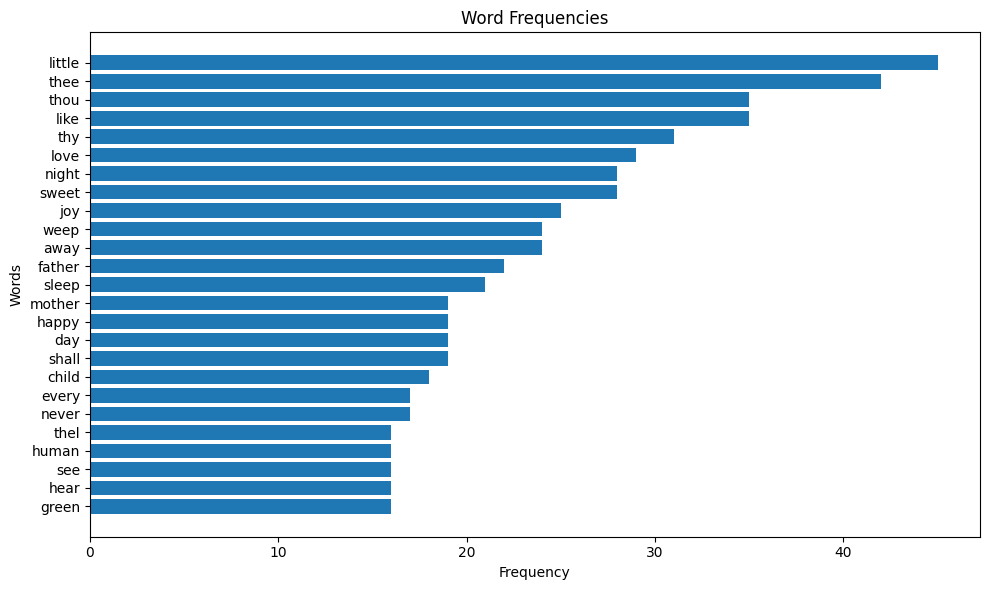

In [4]:
# We convert all words to lowercase. This is done here so words like "thee" and "Thee" are correctly counted as the same word, as well as avoiding issues with stopwords's capitalisation.
# We also filter out punctuation signs (.isalpha() method).
lowercase_words = [word.lower() for word in txt if word.isalpha()]

# Same as before
freqs_approach2 = {
    w: lowercase_words.count(w)
    for w in set(lowercase_words)
    if w not in stopwords
}

# Obtain the top k=25 most frequent words
results_approach2 = sorted(freqs_approach2.items(), key=lambda item: item[1], reverse=True)[:25]

plot_word_frequencies(results_approach2)

In [8]:
# "thee" is old english for "you"; is "you" a stopword?:
print(f"Is \"you\" in stopwords? {'you' in stopwords}")

# same with "thou" (you), "thy" (your); possibly "thel", but definition unclear
print(f"Is \"your\" in stopwords? {'your' in stopwords}")

Is "you" in stopwords? True
Is "your" in stopwords? True


**Partial Analysis:**

There are some old english words equivalent to modern stopwords; proper elimination of these would require an old english stopword dictonary.

For the purpose of our task, we will limit ourselves to rid the top 25 of these, manually.

### Aproach 3

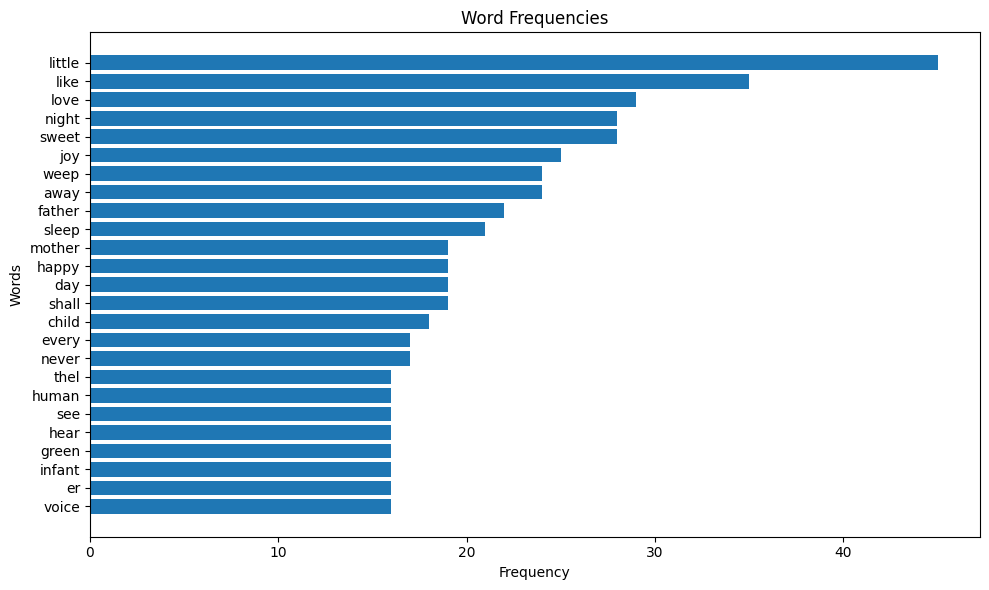

In [6]:
# prompt: make freqs_approach3= freqs_approach2, but excluding the words "thee", "thou", "thy"

freqs_approach3 = {
    key: value for key, value in freqs_approach2.items() if key not in ["thee", "thou", "thy"]
}

# Obtain the top k=25 most frequent words
freqs_approach3 = sorted(freqs_approach3.items(), key=lambda item: item[1], reverse=True)[:25]

plot_word_frequencies(freqs_approach3)

**Partial Analysis:**

 We're unsure of the definitions of "thel" and "er"; we'll leave them just in case. No result for "thel" was found while "er" appears to be an onomatopoeia (https://www.merriam-webster.com/dictionary/er)

 Another note is that "shall" appears as a stopword in some collections (see https://www.ranks.nl/stopwords), and should be revised.

## Final analysis

After some processing (symbols and capitalisation), the answers mostly made sense - but the text still presented challenged in the use of old language, which our stopword list did not cover. We manually eliminated the instances polluting our "top 25", but for a bigger project further processing - with libraries such as [this one](https://legacy.cltk.org/en/latest/old_english.html) - should be performed.

Overall our final list looks good, altough the definition of words such as "thel" and "er" should be revised.